In [3]:
# Importing required libraries
import pandas as pd

# Load the dataset (ensure UTF-8 encoding for Arabic text)
file_path = '/content/Yemeni_tweets_full.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows to inspect the dataset
df.head()



,No,date,id,tweet,username,like_count,retweet_count,lang,source,renderedContent,coordinates,place,hashtags
0,0,2022-12-31 19:33:46,1609150821102395392,@alghadye بدعم المقاومه لتحالف العربي وعلى ...,torki11133,0,0,ar,Twitter Web App,@alghadye بدعم المقاومه لتحالف العربي وعلى ...,NaN,NaN,NaN
1,1,2022-12-31 19:33:46,1609150818913226752,@U7BmxfA0Nsb6wEM المملكه المتوكليه الهاشميه\nل...,HssanBinSaeed,0,0,ar,Twitter for Android,@U7BmxfA0Nsb6wEM المملكه المتوكليه الهاشميه\nل...,NaN,NaN,"['صنعاء', 'موج_البحر', 'نهرفراناسي', 'دكا']"
2,2,2022-12-31 19:33:46,1609150818556719104,@Yamene11 حرر صنعاء من الحوثي وبعدها تعال تكلم...,ahmedalhasani19,0,0,ar,Twitter for iPhone,@Yamene11 حرر صنعاء من الحوثي وبعدها تعال تكلم...,NaN,NaN,NaN
3,3,2022-12-31 19:33:45,1609150814240620544,@Mohamme68710832 هنا وصف جهوي جغرافي .. اليمن ...,AbuSaad08474900,0,0,ar,Twitter for iPhone,@Mohamme68710832 هنا وصف جهوي جغرافي .. اليمن ...,NaN,NaN,NaN
4,4,2022-12-31 19:33:44,1609150808683171840,تبادل التهاني بالعام الجديد ﻻ يعنيني سوف نتباد...,Gahthan9080,0,0,ar,Twitter for Android,تبادل التهاني بالعام الجديد ﻻ يعنيني سوف نتباد...,NaN,NaN,NaN


In [4]:
# Import necessary libraries for text cleaning
import pandas as pd
import re

# Step 1: Filter only Arabic tweets
df = df[df['lang'] == 'ar']

# Step 2: Drop unnecessary columns
df = df[['date', 'tweet', 'username', 'like_count', 'retweet_count', 'hashtags']]

# Step 3: Handle missing values (drop rows with missing tweet content)
df.dropna(subset=['tweet'], inplace=True)

# Step 4: Clean the tweets
def clean_tweet(text):
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters, numbers, and English letters
    text = re.sub(r'[^ء-ي\s]', '', text)

    # Normalize Arabic text (optional, for simplification)
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'ى', 'ي', text)

    return text

# Apply text cleaning
df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)

# Display cleaned data to inspect
df[['tweet', 'cleaned_tweet']].head()


,tweet,cleaned_tweet
0,@alghadye بدعم المقاومه لتحالف العربي وعلى ...,بدعم المقاومه لتحالف العربي وعلي راسهم لا...
1,@U7BmxfA0Nsb6wEM المملكه المتوكليه الهاشميه\nل...,المملكه المتوكليه الهاشميه\nلهاجذور ظاربه في ...
2,@Yamene11 حرر صنعاء من الحوثي وبعدها تعال تكلم...,حرر صنعاء من الحوثي وبعدها تعال تكلم عن الشعب
3,@Mohamme68710832 هنا وصف جهوي جغرافي .. اليمن ...,هنا وصف جهوي جغرافي اليمن مسمي عربي حجازي جه...
4,تبادل التهاني بالعام الجديد ﻻ يعنيني سوف نتباد...,تبادل التهاني بالعام الجديد يعنيني سوف نتبادل...


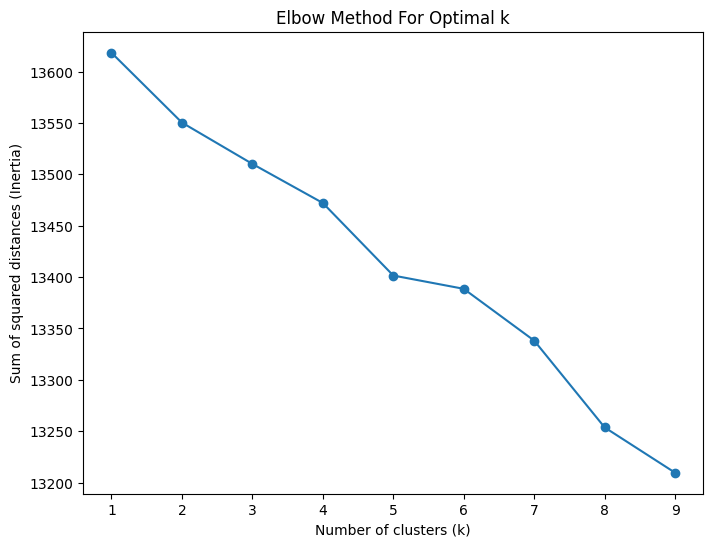

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


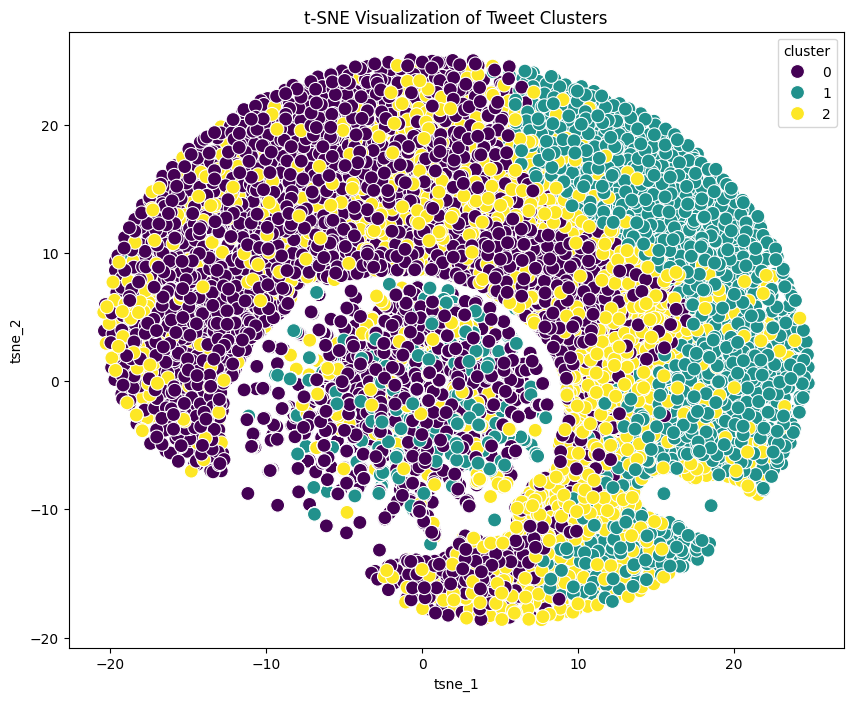


Cluster 0 sample tweets:
0     بدعم المقاومه  لتحالف  العربي  وعلي راسهم  لا...
2        حرر صنعاء من الحوثي وبعدها تعال تكلم عن الشعب
3     هنا وصف جهوي جغرافي  اليمن مسمي عربي حجازي جه...
4    تبادل التهاني بالعام الجديد  يعنيني سوف نتبادل...
8      في ناس ياكلو من القمامه لن رجال جي صنعاء وشو...
Name: cleaned_tweet, dtype: object

Cluster 1 sample tweets:
5     هذ الايام كثرت المصانع البفك في اليمن بشكل غير...
6     لاجنوب او شمال يمني في حضرموت \nحضرموت بلد ووط...
9       هل تعلمون\n شهريا يتم تحويل مليار دولار من ا...
11                              ههههههه حاطين علم اليمن
12     اليمن الكبير وعمان وساحلها  بلاد قحطان  محتله...
Name: cleaned_tweet, dtype: object

Cluster 2 sample tweets:
1      المملكه المتوكليه الهاشميه\nلهاجذور ظاربه في ...
7     فطيم اشتكي لاسرائيل وكل الدول عاقبوا الفلسطيني...
19     سود الله وجيهكم  كلكم  وين  هذي تنميه  الي تد...
24     ان تعيش سعيدا بوحدتك \nخيرا لك من الف منافق حولك
28     الطريق مفتوحه من شحن الي صنعاء \nوالامور طيبه...
Name: cleaned_twe

In [5]:
# Import necessary libraries for clustering and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Step 1: Vectorize the cleaned tweets using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, analyzer='word', ngram_range=(1, 2))
X = vectorizer.fit_transform(df['cleaned_tweet'])

# Step 2: Use the Elbow method to find the optimal number of clusters
def plot_elbow_method(X):
    sse = []
    k_range = range(1, 10)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)  # Inertia measures the within-cluster sum of squares

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of squared distances (Inertia)')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# Call the function to plot the Elbow method
plot_elbow_method(X)

# Step 3: Based on the elbow curve, we choose the optimal number of clusters (e.g., 3 for pos/neg/neutral)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 4: Visualize clusters using t-SNE (for dimensionality reduction)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Add t-SNE results to the dataframe
df['tsne_1'] = X_tsne[:, 0]
df['tsne_2'] = X_tsne[:, 1]

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster', data=df, palette='viridis', s=100)
plt.title('t-SNE Visualization of Tweet Clusters')
plt.show()

# Step 5: Print some sample tweets from each cluster
for cluster_num in range(optimal_k):
    print(f"\nCluster {cluster_num} sample tweets:")
    print(df[df['cluster'] == cluster_num]['cleaned_tweet'].head(5))



Cluster 0 sample tweets:
0     بدعم المقاومه  لتحالف  العربي  وعلي راسهم  لا...
2        حرر صنعاء من الحوثي وبعدها تعال تكلم عن الشعب
3     هنا وصف جهوي جغرافي  اليمن مسمي عربي حجازي جه...
4    تبادل التهاني بالعام الجديد  يعنيني سوف نتبادل...
8      في ناس ياكلو من القمامه لن رجال جي صنعاء وشو...
Name: cleaned_tweet, dtype: object

Cluster 1 sample tweets:
5     هذ الايام كثرت المصانع البفك في اليمن بشكل غير...
6     لاجنوب او شمال يمني في حضرموت \nحضرموت بلد ووط...
9       هل تعلمون\n شهريا يتم تحويل مليار دولار من ا...
11                              ههههههه حاطين علم اليمن
12     اليمن الكبير وعمان وساحلها  بلاد قحطان  محتله...
Name: cleaned_tweet, dtype: object

Cluster 2 sample tweets:
1      المملكه المتوكليه الهاشميه\nلهاجذور ظاربه في ...
7     فطيم اشتكي لاسرائيل وكل الدول عاقبوا الفلسطيني...
19     سود الله وجيهكم  كلكم  وين  هذي تنميه  الي تد...
24     ان تعيش سعيدا بوحدتك \nخيرا لك من الف منافق حولك
28     الطريق مفتوحه من شحن الي صنعاء \nوالامور طيبه...
Name: cleaned_twe

<ipython-input-6-981d662b87af>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')


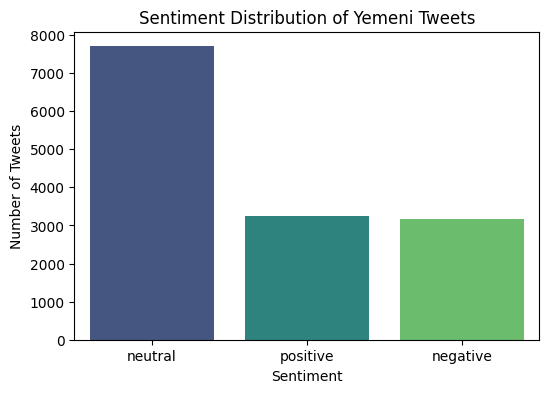

In [6]:
# Sample tweets from each cluster
for cluster_num in range(optimal_k):
    print(f"\nCluster {cluster_num} sample tweets:")
    print(df[df['cluster'] == cluster_num]['cleaned_tweet'].head(5))

# Manually inspect and assign sentiment labels to the clusters
# Assuming, after manual inspection, you decide:
# - Cluster 0 is mostly 'neutral'
# - Cluster 1 is mostly 'positive'
# - Cluster 2 is mostly 'negative'

# Map clusters to sentiment labels
cluster_to_sentiment = {
    0: 'neutral',
    1: 'positive',
    2: 'negative'
}

# Assign sentiment labels to the dataset
df['sentiment'] = df['cluster'].map(cluster_to_sentiment)

# Display some examples of tweets with assigned sentiments
df[['cleaned_tweet', 'sentiment']].head(10)

# Sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')
plt.title('Sentiment Distribution of Yemeni Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [10]:
!pip install wordcloud
import urllib.request
import os

# Step 1: Download an Arabic-compatible font (e.g., Amiri font)
font_url = 'https://github.com/google/fonts/raw/main/ofl/amiri/Amiri-Regular.ttf'
font_path = '/usr/share/fonts/truetype/amiri.ttf'
if not os.path.exists(font_path):
    urllib.request.urlretrieve(font_url, font_path)

# Step 2: Function to generate word clouds using the Arabic font
def generate_wordcloud(cluster_number):
    cluster_text = " ".join(df[df['cluster'] == cluster_number]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(cluster_text)

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_number}')
    plt.show()

# Re-run to generate word clouds for each cluster
for cluster_num in range(optimal_k):
    generate_wordcloud(cluster_num)


NameError: name 'WordCloud' is not defined

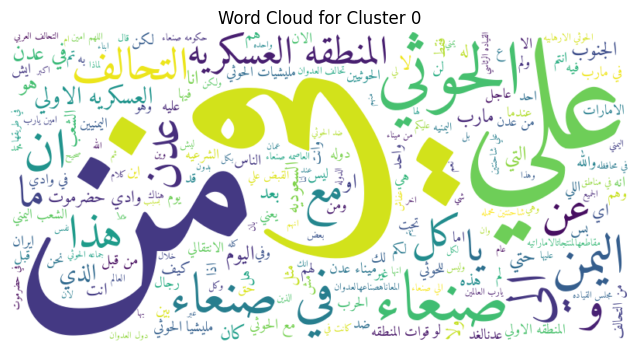

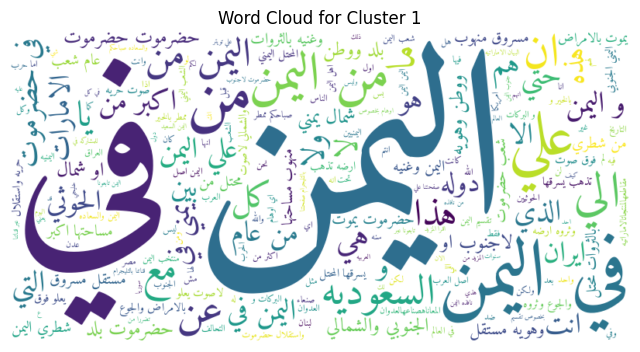

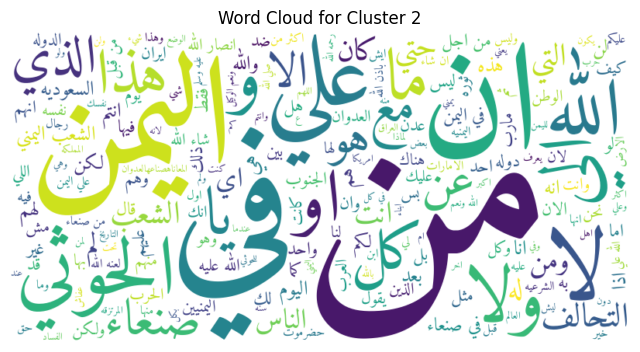

In [11]:
!pip install wordcloud
import urllib.request
import os
from wordcloud import WordCloud # Import the WordCloud class

# Step 1: Download an Arabic-compatible font (e.g., Amiri font)
font_url = 'https://github.com/google/fonts/raw/main/ofl/amiri/Amiri-Regular.ttf'
font_path = '/usr/share/fonts/truetype/amiri.ttf'
if not os.path.exists(font_path):
    urllib.request.urlretrieve(font_url, font_path)

# Step 2: Function to generate word clouds using the Arabic font
def generate_wordcloud(cluster_number):
    cluster_text = " ".join(df[df['cluster'] == cluster_number]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(cluster_text)

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_number}')
    plt.show()

# Re-run to generate word clouds for each cluster
for cluster_num in range(optimal_k):
    generate_wordcloud(cluster_num)

In [15]:
!pip install transformers torch datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00


In [17]:
# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Step 1: Load AraBERT and Tokenizer
model_name = "aubmindlab/bert-base-arabertv02"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Step 2: Custom Dataset Class for PyTorch
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Step 3: Prepare Data
def prepare_data(df):
    # Convert sentiment to numerical labels (e.g., positive=0, neutral=1, negative=2)
    sentiment_to_label = {'positive': 0, 'neutral': 1, 'negative': 2}
    df['label'] = df['sentiment'].map(sentiment_to_label)

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        df['cleaned_tweet'].values,
        df['label'].values,
        test_size=0.3,
        random_state=42,
        stratify=df['label']
    )

    # Create Dataset objects
    train_dataset = SentimentDataset(X_train, y_train, tokenizer)
    test_dataset = SentimentDataset(X_test, y_test, tokenizer)

    return train_dataset, test_dataset

train_dataset, test_dataset = prepare_data(df)

# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
)

# Step 5: Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

# Step 6: Train the Model
trainer.train()

# Step 7: Evaluate the Model
predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), axis=1)

# Convert numerical labels back to sentiment, ensuring tensor values are converted to Python integers
label_to_sentiment = {0: 'positive', 1: 'neutral', 2: 'negative'}

# Convert predictions to plain integers and map them to sentiment labels
pred_sentiments = []
for pred in preds:
    pred_int = int(pred.item())  # Convert to Python int
    if pred_int in label_to_sentiment:
        pred_sentiments.append(label_to_sentiment[pred_int])
    else:
        print(f"Warning: Unexpected label {pred_int} encountered. Defaulting to 'neutral'.")
        pred_sentiments.append('neutral')  # Default handling for unexpected labels

# Convert true labels
true_sentiments = [label_to_sentiment[label] for label in predictions.label_ids if label in label_to_sentiment]

# Classification Report
print("Classification Report:\n")
print(classification_report(true_sentiments, pred_sentiments))

# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(true_sentiments, pred_sentiments)
precision, recall, f1, _ = precision_recall_fscore_support(true_sentiments, pred_sentiments, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.488000,0.212342
2,0.198000,0.204169
3,0.127800,0.245845


Classification Report:

              precision    recall  f1-score   support

    negative       0.84      0.92      0.88       951
     neutral       0.97      0.93      0.95      2309
    positive       0.94      0.95      0.95       977

    accuracy                           0.93      4237
   macro avg       0.92      0.93      0.93      4237
weighted avg       0.94      0.93      0.93      4237

Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.93


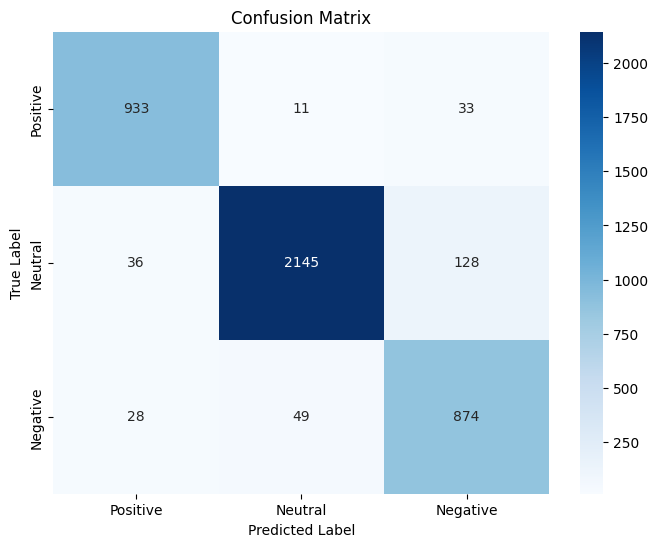

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_sentiments, pred_sentiments, labels=['positive', 'neutral', 'negative'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


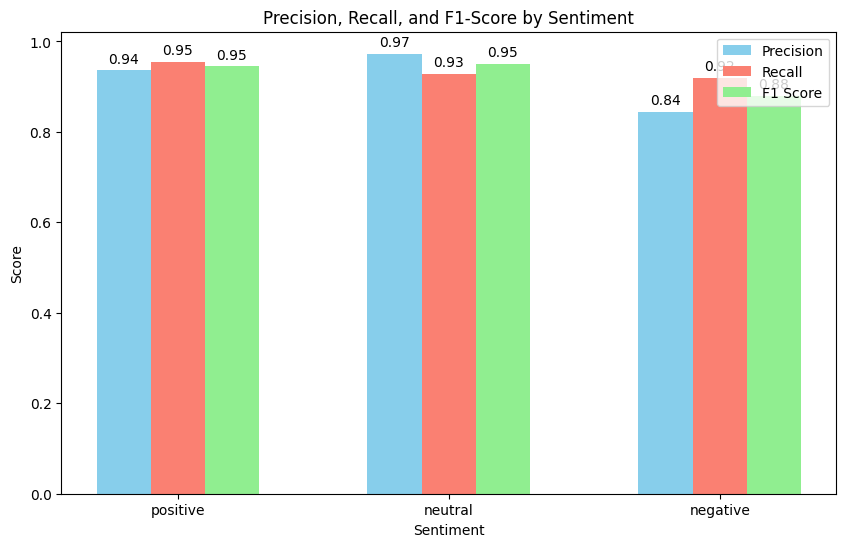

In [19]:
import numpy as np

# Get precision, recall, and F1 score for each sentiment
from sklearn.metrics import precision_recall_fscore_support

sentiments = ['positive', 'neutral', 'negative']
precision, recall, f1, _ = precision_recall_fscore_support(true_sentiments, pred_sentiments, labels=sentiments)

# Plot Precision, Recall, and F1 Score
x = np.arange(len(sentiments))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='salmon')
rects3 = ax.bar(x + width, f1, width, label='F1 Score', color='lightgreen')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(sentiments)
ax.legend()

# Attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()
